In [1]:
import pandas as pd 
import numpy as np

# data = pd.read_csv('./data.csv',  index_col=None)
data = pd.read_csv('./IntE_terms_for_Reweighting.csv',  index_col=None)



def indexify(x):

    seq = sorted(x, reverse = True)
    index = [seq.index(v)+1 for v in x]
    return index


In [2]:
data

,System,Elec-SR,VdW-SR,Elec-LR,VdW-LR,sum_E,Expt_Kd
0,WT-Ca,-1950.9,-25.9,732.3,15.6,-1228.9,71000.00
1,4P2A-Ca,-2213.2,-24.1,756.8,15.9,-1464.6,26000.00
2,D9M-Nd,-3807.2,42.4,721.5,37.2,-3006.1,2150.00
3,D9H-Nd,-3842.6,43.4,754.4,39.7,-3005.1,1460.00
4,D9A-Nd,-3798.1,44.4,723.2,37.2,-2993.3,397.00
5,D9N-Nd,-3839.3,44.8,655.2,38.4,-3100.9,53.10
6,WT-Sm,-3361.2,44.4,732.4,38.6,-2545.8,6.60
7,WT-La,-3270.2,30.4,728.7,34.3,-2476.8,5.30
8,WT-Nd,-3339.8,38.9,730.1,36.7,-2534.1,5.30
9,WT-Tb,-3417.0,50.1,734.5,40.9,-2591.5,2.10


([<matplotlib.axis.XTick at 0x255dffb8310>,
 [Text(1, 0, 'WT-Ca'),
  Text(2, 0, '4P2A-Ca'),
  Text(3, 0, 'D9M-Nd'),
  Text(4, 0, 'D9H-Nd'),
  Text(5, 0, 'D9A-Nd'),
  Text(6, 0, 'D9N-Nd'),
  Text(7, 0, 'WT-Sm'),
  Text(8, 0, 'WT-La'),
  Text(9, 0, 'WT-Nd'),
  Text(10, 0, 'WT-Tb'),
  Text(11, 0, 'WT-Y'),
  Text(12, 0, 'WT-Gd'),
  Text(13, 0, '4P2A-La'),
  Text(14, 0, '4P2A-Nd')])

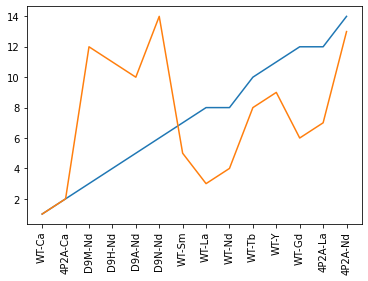

In [5]:
import matplotlib.pyplot as plt 

y1 = indexify(data['Expt_Kd'])
y2 = indexify(data['sum_E'])

x = [i+1 for i in range(len(y1))]


plt.plot(x,y1)
plt.plot(x,y2)
plt.xticks(x,list(data['System']),rotation = 90)

In [4]:
kd_rank = indexify(list(data['Expt_Kd']))
print(kd_rank)

[1, 2, 3, 4, 5, 6, 7, 8, 8, 10, 11, 12, 12, 14]


In [5]:
weights = np.array([1,1,1,1])
data_4 = np.array(data[["Elec-SR","VdW-SR","Elec-LR","VdW-LR"]])
data_4

array([[-1950.9,   -25.9,   732.3,    15.6],
       [-2213.2,   -24.1,   756.8,    15.9],
       [-3807.2,    42.4,   721.5,    37.2],
       [-3842.6,    43.4,   754.4,    39.7],
       [-3798.1,    44.4,   723.2,    37.2],
       [-3839.3,    44.8,   655.2,    38.4],
       [-3361.2,    44.4,   732.4,    38.6],
       [-3270.2,    30.4,   728.7,    34.3],
       [-3339.8,    38.9,   730.1,    36.7],
       [-3417. ,    50.1,   734.5,    40.9],
       [-3435.7,    52.5,   733.7,    40.7],
       [-3380.1,    45.3,   732.2,    38.8],
       [-3370.2,    33.4,   730.2,    34.4],
       [-3837.7,    31.4,   755.6,    33.8]])

In [6]:
list_ = indexify(data['sum_E'])

print(list_)

[1, 2, 12, 11, 10, 14, 5, 3, 4, 8, 9, 6, 7, 13]


In [7]:
def sum_calc_easy(weights, kd_rank, data_4):
    list_ = []
    for i in range(data_4.shape[0]):
        list_.append(np.sum(data_4[i]*weights))

    list_ = indexify(np.array(list_))



    return np.corrcoef(np.array(list_),np.array(kd_rank))[1][0]

In [21]:
frac = np.linspace(.0001,1,20)
mult = np.linspace(2,1000,20)
frac_mult = np.concatenate((frac,mult), axis = 0)
frac_mult

array([1.00000000e-04, 5.27263158e-02, 1.05352632e-01, 1.57978947e-01,
       2.10605263e-01, 2.63231579e-01, 3.15857895e-01, 3.68484211e-01,
       4.21110526e-01, 4.73736842e-01, 5.26363158e-01, 5.78989474e-01,
       6.31615789e-01, 6.84242105e-01, 7.36868421e-01, 7.89494737e-01,
       8.42121053e-01, 8.94747368e-01, 9.47373684e-01, 1.00000000e+00,
       2.00000000e+00, 5.45263158e+01, 1.07052632e+02, 1.59578947e+02,
       2.12105263e+02, 2.64631579e+02, 3.17157895e+02, 3.69684211e+02,
       4.22210526e+02, 4.74736842e+02, 5.27263158e+02, 5.79789474e+02,
       6.32315789e+02, 6.84842105e+02, 7.37368421e+02, 7.89894737e+02,
       8.42421053e+02, 8.94947368e+02, 9.47473684e+02, 1.00000000e+03])

In [22]:
dict_ = {}
counter = 0
for i in frac_mult:
    for j in frac_mult:
        for k in frac_mult:
            for l in frac_mult:
                inside_dict = {}
                inside_dict['w1'] = i
                inside_dict['w2'] = j
                inside_dict['w3'] = k
                inside_dict['w4'] = l 
                
                sum_ = sum_calc_easy(np.array([i,j,k,l]), kd_rank, data_4)
                inside_dict['sum'] = sum_
                dict_[counter] = inside_dict
                counter+=1

In [ ]:
# import pickle

# with open('weights_n_pearson.pkl', 'wb') as fp:
#     pickle.dump(dict_, fp)
#     print('dictionary saved successfully to file')

In [24]:
main_data = pd.DataFrame(dict_).transpose().sort_values(by = 'sum')
main_data

,w1,w2,w3,w4,sum
1186502,0.947374,54.526316,107.052632,107.052632,-0.621407
1250502,1.000000,54.526316,107.052632,107.052632,-0.621407
1316184,2.000000,107.052632,212.105263,212.105263,-0.621407
802501,0.631616,54.526316,107.052632,54.526316,-0.621407
1316183,2.000000,107.052632,212.105263,159.578947,-0.616888
...,...,...,...,...,...
1348999,54.526316,0.157979,0.210605,1000.000000,0.314093
1344559,54.526316,0.000100,0.684242,1000.000000,0.314093
1348959,54.526316,0.157979,0.157979,1000.000000,0.314093
1353919,54.526316,0.315858,0.368484,1000.000000,0.314093


In [ ]:
# main_data.to_csv('weights_nd_pearson.csv', sep=',', index=False, encoding='utf-8')

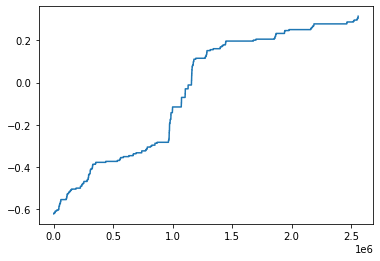

In [25]:
import matplotlib.pyplot as plt
plt.plot([x+1 for x in range(len(main_data['sum']))], main_data['sum'])

In [26]:
np.array(main_data)[-1]

array([5.45263158e+01, 2.10605263e-01, 7.36868421e-01, 1.00000000e+03,
       3.14093216e-01])

In [27]:
weights = np.array(main_data)[-1][:-1]
weights

array([5.45263158e+01, 2.10605263e-01, 7.36868421e-01, 1.00000000e+03])

In [ ]:
import pandas as pd 
import numpy as np




weights_nd_pearson = pd.read_csv('./weights_nd_pearson.csv',  index_col=None)
weights = np.array(main_data)[-1][:-1]

weights_nd_pearson

In [14]:
data

,System,Elec-SR,VdW-SR,Elec-LR,VdW-LR,sum_E,Expt_Kd
0,WT-Ca,-1950.9,-25.9,732.3,15.6,-1228.9,71000.00
1,4P2A-Ca,-2213.2,-24.1,756.8,15.9,-1464.6,26000.00
2,D9M-Nd,-3807.2,42.4,721.5,37.2,-3006.1,2150.00
3,D9H-Nd,-3842.6,43.4,754.4,39.7,-3005.1,1460.00
4,D9A-Nd,-3798.1,44.4,723.2,37.2,-2993.3,397.00
5,D9N-Nd,-3839.3,44.8,655.2,38.4,-3100.9,53.10
6,WT-Sm,-3361.2,44.4,732.4,38.6,-2545.8,6.60
7,WT-La,-3270.2,30.4,728.7,34.3,-2476.8,5.30
8,WT-Nd,-3339.8,38.9,730.1,36.7,-2534.1,5.30
9,WT-Tb,-3417.0,50.1,734.5,40.9,-2591.5,2.10


In [ ]:
# weights = np.array(weights_nd_pearson)[-1][:-1]
# weights

In [ ]:
data

In [28]:
system = {}
energies = {}
kd = {}



for i in np.array(data):

    a = {}
    energies = i[1:-2]
    a['energy'] = energies
    a['kd'] = i[-2]
    a['sum'] = sum(energies)
    weighted_energy = np.multiply(np.array(energies),np.array(weights))
    a['weighted_energy'] = weighted_energy
    sum_weighted_energy = np.sum(np.multiply(np.array(energies),np.array(weights)))
    a['weighted_sum'] = sum_weighted_energy
    a['frac_contribution'] = weighted_energy/sum_weighted_energy

    system[i[0]] = a


In [29]:
system.keys()

dict_keys(['WT-Ca', '4P2A-Ca', 'D9M-Nd', 'D9H-Nd', 'D9A-Nd', 'D9N-Nd', 'WT-Sm', 'WT-La', 'WT-Nd', 'WT-Tb', 'WT-Y', 'WT-Gd', '4P2A-La', '4P2A-Nd'])

In [30]:
kd_list = indexify(data['Expt_Kd'])
sum_E = indexify([system[i]['sum'] for i in system.keys()])
sum_wE = indexify([system[i]['weighted_sum'] for i in system.keys()])
indx = list(system.keys())

rank_weighted = {}
rank_weighted['index'] = indx
rank_weighted['kd_list'] = kd_list 
rank_weighted['sum_E'] = sum_E
rank_weighted['sum_wE'] = sum_wE



rank_weighted = pd.DataFrame(rank_weighted).sort_values(by = 'kd_list')

In [32]:
rank_weighted

,index,kd_list,sum_E,sum_wE
0,WT-Ca,1,1,1
1,4P2A-Ca,2,2,2
2,D9M-Nd,3,12,12
3,D9H-Nd,4,11,10
4,D9A-Nd,5,10,11
5,D9N-Nd,6,14,13
6,WT-Sm,7,5,4
7,WT-La,8,3,3
8,WT-Nd,8,4,5
9,WT-Tb,10,8,6


In [33]:
print(kd_rank)

print(sum_wE)
print(np.corrcoef(kd_list,sum_wE)[1][0])

print('----------------------')


print(kd_list)
print(sum_E)
print(np.corrcoef(kd_list,sum_E)[1][0])

[1, 2, 3, 4, 5, 6, 7, 8, 8, 10, 11, 12, 12, 14]
[1, 2, 12, 10, 11, 13, 4, 3, 5, 6, 8, 7, 9, 14]
0.31409321584472233
----------------------
[1, 2, 3, 4, 5, 6, 7, 8, 8, 10, 11, 12, 12, 14]
[1, 2, 12, 11, 10, 14, 5, 3, 4, 8, 9, 6, 7, 13]
0.24630331314442253


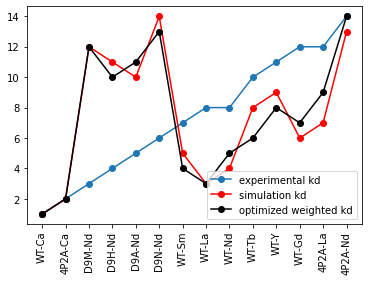

In [34]:
import matplotlib.pyplot as plt

x = [i+1 for i in range(len(rank_weighted['kd_list']))]

plt.plot(x,rank_weighted['kd_list'], marker = 'o')
plt.plot(x,rank_weighted['sum_E'],color = 'r', marker = 'o')
plt.plot(x,rank_weighted['sum_wE'],color = 'k', marker = 'o')
plt.xticks(x,list(system.keys()),rotation = 90)

plt.legend(['experimental kd','simulation kd', 'optimized weighted kd'])


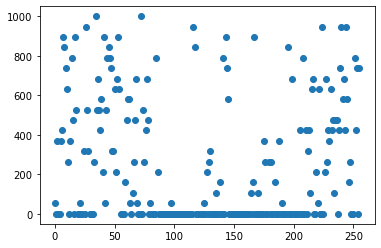

In [35]:
y = main_data['w2'][0::10000]
x = np.arange(len(y))
plt.scatter(x,y)

In [36]:
top_cands = main_data[main_data['sum'] > 0.31]#[main_data['w1'] > 1]
top_cands

,w1,w2,w3,w4,sum
1352239,54.526316,0.263232,0.263232,1000.0,0.314093
1352519,54.526316,0.263232,0.631616,1000.0,0.314093
1359039,54.526316,0.473737,0.789495,1000.0,0.314093
1360399,54.526316,0.526363,0.473737,1000.0,0.314093
1368119,54.526316,0.789495,0.105353,1000.0,0.314093
...,...,...,...,...,...
1348999,54.526316,0.157979,0.210605,1000.0,0.314093
1344559,54.526316,0.000100,0.684242,1000.0,0.314093
1348959,54.526316,0.157979,0.157979,1000.0,0.314093
1353919,54.526316,0.315858,0.368484,1000.0,0.314093


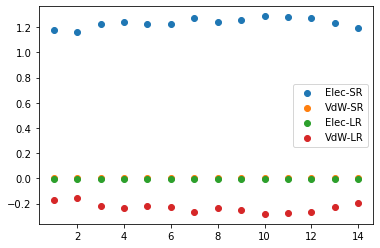

In [37]:
data_4 = np.array(data[["Elec-SR","VdW-SR","Elec-LR","VdW-LR"]])

frac_es = [system[i]['frac_contribution'][0] for i in system.keys()]
frac_vs = [system[i]['frac_contribution'][1] for i in system.keys()]
frac_el = [system[i]['frac_contribution'][2] for i in system.keys()]
frac_vl = [system[i]['frac_contribution'][3] for i in system.keys()]
x_frac = [i+1 for i in range(len(frac_es))]


plt.scatter(x_frac,frac_es)
plt.scatter(x_frac,frac_vs)
plt.scatter(x_frac,frac_el)
plt.scatter(x_frac,frac_vl)
# plt.xticks(x,list(data['System']),rotation = 90)
plt.legend(["Elec-SR","VdW-SR","Elec-LR","VdW-LR"])

c:\Users\15156\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\15156\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\15156\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
c:\Users\15156\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and

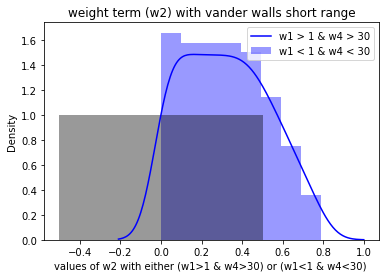

In [38]:
import seaborn as sns

y1 = top_cands['w2'][top_cands['w1'] > 1][top_cands['w4'] > 30]
y2 = top_cands['w2'][top_cands['w1'] <= 1][top_cands['w4'] > 30]
y3 = top_cands['w2'][top_cands['w1'] > 1][top_cands['w4'] < 30]
y4 = top_cands['w2'][top_cands['w1'] <= 1][top_cands['w4'] < 30]


x1 = np.arange(len(y1))
x2 = np.arange(len(y2))
x3 = np.arange(len(y3))
x4 = np.arange(len(y4))


# plt.ylim([0,2])
# plt.xlim([0,145])


# plt.scatter(x1,y1,color = 'b')
# plt.scatter(x2,y2,color='r')
# plt.scatter(x3,y3,color ='g')
# plt.scatter(x4,y4, color = 'k')
sns.distplot(y1,color = 'b')
sns.distplot(y2,color='r')
sns.distplot(y3,color ='g')
sns.distplot(y4, color = 'k')


plt.title('weight term (w2) with vander walls short range')
plt.xlabel('values of w2 with either (w1>1 & w4>30) or (w1<1 & w4<30) ')
plt.legend(['w1 > 1 & w4 > 30','w1 < 1 & w4 < 30'])

In [39]:
y1

1352239    0.263232
1352519    0.263232
1359039    0.473737
1360399    0.526363
1368119    0.789495
             ...   
1348999    0.157979
1344559    0.000100
1348959    0.157979
1353919    0.315858
1350999    0.210605
Name: w2, Length: 257, dtype: float64

Text(0.5, 1.0, 'weight term with electrostatic long range')

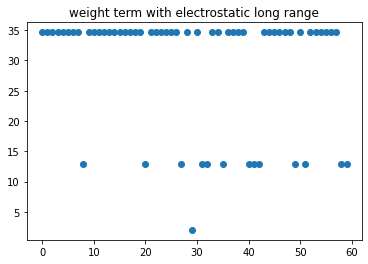

In [69]:
y = top_cands['w4']
x = np.arange(len(y))

plt.scatter(x,y)
plt.title('weight term with electrostatic long range')